In [ ]:
#Difference In Differences

In [11]:
#Card & Kreuger 
#https://davidcard.berkeley.edu/papers/njmin-aer.pdf
#NJ raised minimum wage from $4.25 to $5.05, while neighboring PA kept the MW at $4.25
#Economic theory suggests that higher labor costs will reduce the quantity of labor demanded.  Did it?

In [15]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('card_kreuger.csv')
df.head()
#state = 1 if NJ, 0 if PA

,state,total_emp_feb,total_emp_nov
0,0,40.50,24.0
1,0,13.75,11.5
2,0,8.50,10.5
3,0,34.00,20.0
4,0,24.00,35.5


In [97]:
before = df[['total_emp_feb', 'state']]
before['mw_increase'] = 0 #treatment
before.columns = ['employees_per', 'state', 'mw_increase']


after = df[['total_emp_nov', 'state']]
after['mw_increase'] = 1
after.columns = ['employees_per', 'state', 'mw_increase']

df = pd.concat([before, after])
df['interaction'] = df['state'] * df['mw_increase'] #equals 1 if NJ and post-increase
df.head()

,employees_per,state,mw_increase,interaction
0,40.50,0,0,0
1,13.75,0,0,0
2,8.50,0,0,0
3,34.00,0,0,0
4,24.00,0,0,0


In [99]:
#Difference in Differences Formula: Y = B0 + B1 * Group_Binary + B2 * Post_Treatment_Binary + B3 * (Group... * Post...)
#B3 is the difference in the differences

In [101]:
model = smf.ols(formula='employees_per ~ state + mw_increase + interaction', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          employees_per   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.947
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.121
Time:                        02:55:30   Log-Likelihood:                -2817.6
No. Observations:                 768   AIC:                             5643.
Df Residuals:                     764   BIC:                             5662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      23.3800      1.098     21.288      0.000      21.224      25.536
state          -2.9494      1.224     -2.409      0.016      -5.353      -0.546
mw_increase    -2.2833      1.553     -1.470      0.142      -5.332       0.766
interaction     2.7500      1.731      1.588      0.113      -0.649       6.149
==============================================================================
Omnibus:                      212.243   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.734
Skew:                           1.278   Prob(JB):                    3.90e-166
Kurtosis:                       7.155   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Surpisingly, employment rose in the state with the newly increased minimum wage while employment fell in the neighboring state.
#HOWEVER, the p-value on the interaction (D-i-D) term is 0.113, making it statistically insignificant

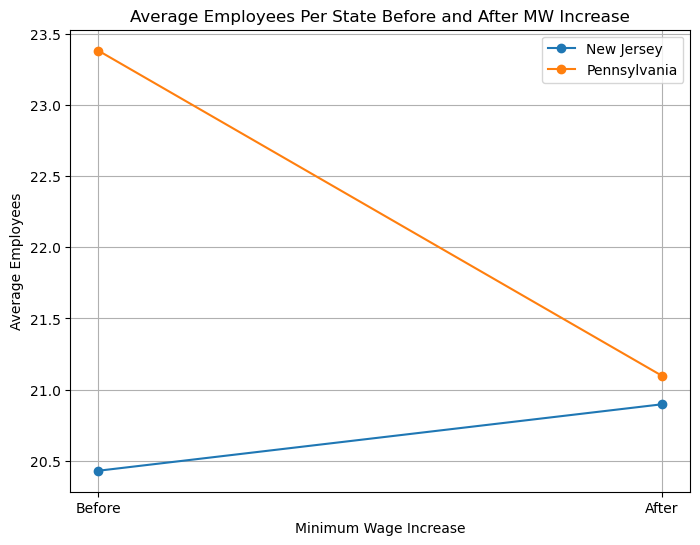

In [103]:
grouped = df.groupby(['state', 'mw_increase'])['employees_per'].mean().reset_index()
nj_data = grouped[grouped['state'] == 1]
pa_data = grouped[grouped['state'] == 0]
plt.figure(figsize=(8, 6))
plt.plot(nj_data['mw_increase'], nj_data['employees_per'], marker='o', label='New Jersey')
plt.plot(pa_data['mw_increase'], pa_data['employees_per'], marker='o', label='Pennsylvania')
plt.title('Average Employees Per State Before and After MW Increase')
plt.xlabel('Minimum Wage Increase')
plt.ylabel('Average Employees')
plt.xticks([0, 1], ['Before', 'After'])
plt.legend()
plt.grid(True)
plt.show()

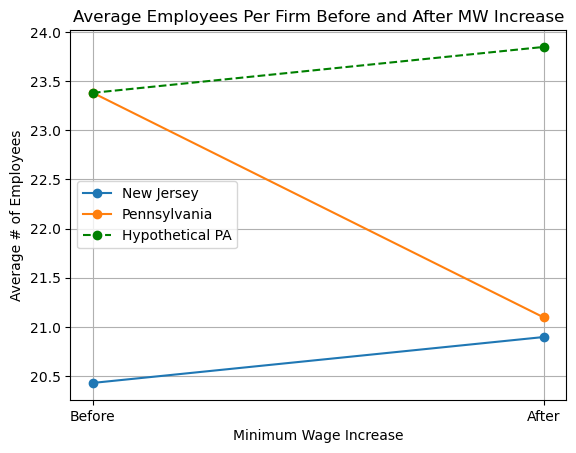

In [109]:
#Parallel Slope Counterfactual
plt.plot(nj_data['mw_increase'], nj_data['employees_per'], marker='o', label='New Jersey')
plt.plot(pa_data['mw_increase'], pa_data['employees_per'], marker='o', label='Pennsylvania')
pa_slope = (pa_data.iloc[1]['employees_per'] - pa_data.iloc[0]['employees_per']) / (pa_data.iloc[1]['mw_increase'] - pa_data.iloc[0]['mw_increase'])
nj_intercept = nj_data.iloc[0]['employees_per']
hypothetical_nj = pa_slope + nj_intercept
plt.plot([0, 1], [pa_data.iloc[0]['employees_per'], hypothetical_pa], marker='o', linestyle='--', color='green', label='Hypothetical PA')
plt.title('Average Employees Per Firm Before and After MW Increase')
plt.xlabel('Minimum Wage Increase')
plt.ylabel('Average # of Employees')
plt.xticks([0, 1], ['Before', 'After'])
plt.legend()
plt.grid(True)
plt.show()